# 🧠 Visualizing High-Dimensional Data with t-SNE

In this notebook, we will explore the use of **t-SNE** (t-distributed Stochastic Neighbor Embedding) for visualizing high-dimensional data.

We will work with the classic **Iris dataset**, which contains 150 samples of iris flowers with four features each. Our goal is to reduce the dimensionality of the dataset to 2D using t-SNE and visualize the results.

Steps:
1. Load and explore the dataset
2. Visualize using PCA (baseline)
3. Apply t-SNE
4. Compare the visualizations


In [1]:
# 📥 Code Cell – Load Libraries and Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
# 📊 Code Cell – Load and Explore Dataset
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier handling
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].map(lambda i: target_names[i])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# 🧼 Code Cell – Preprocessing
# Standardize features before applying t-SNE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

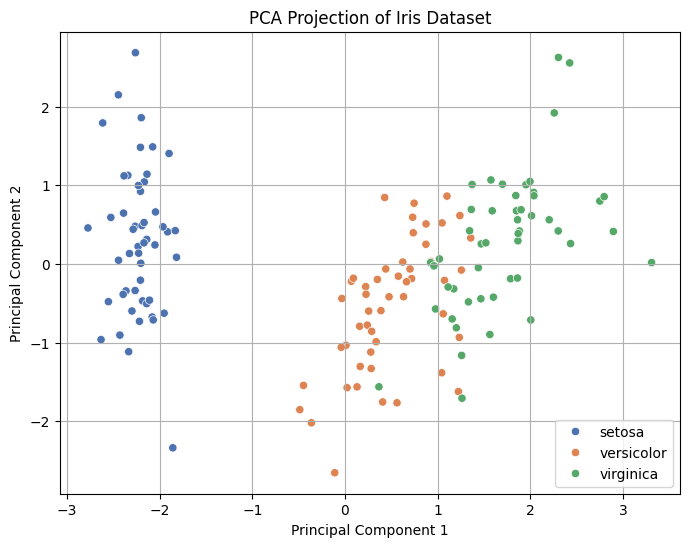

In [4]:
# 🔍 Code Cell – PCA Visualization (Baseline)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['target_name'], palette="deep")
plt.title("PCA Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# 🧠 Code Cell – Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\berme\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as pro

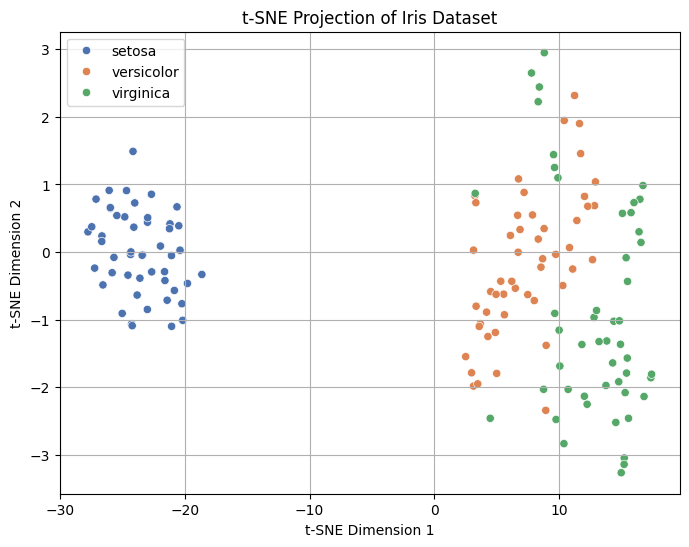

In [6]:
# 🌈 Code Cell – t-SNE Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['target_name'], palette="deep")
plt.title("t-SNE Projection of Iris Dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.manifold import trustworthiness

tw_pca = trustworthiness(X_scaled, X_pca, n_neighbors=5)
tw_tsne = trustworthiness(X_scaled, X_tsne, n_neighbors=5)

print(f"Trustworthiness (PCA): {tw_pca:.3f}")
print(f"Trustworthiness (t-SNE): {tw_tsne:.3f}")


Trustworthiness (PCA): 0.974
Trustworthiness (t-SNE): 0.993


## ✅ Summary

- PCA provides a linear projection of the data, capturing maximum variance.
- t-SNE, on the other hand, focuses on preserving local neighborhoods and provides a clearer view of clustered structures.
- The Iris dataset illustrates how t-SNE can reveal separability between classes, even in cases where PCA shows overlap.
- Choosing the right **perplexity** is key; it controls the balance between local and global structure.

t-SNE is a powerful tool for exploring and understanding high-dimensional data, especially when used for visualization purposes.
